In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve,ConfusionMatrixDisplay,silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans , DBSCAN
from itertools import combinations
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('wine-clustering.csv')

In [3]:
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
111,12.52,2.43,2.17,21.0,88,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325
139,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590
163,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
153,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
98,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660


In [4]:
st = StandardScaler()
df_scaled = st.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled , columns=df.columns)
df = df_scaled

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    float64
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [6]:
# sns.pairplot(df)
# plt.show()

## Fit All Data With PCA

In [7]:
pca = PCA(n_components=2)
X = pca.fit_transform(df)

In [8]:
X = pd.DataFrame(X , columns=['V1' , 'V2'])

In [9]:
X

,V1,V2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831
...,...,...
173,-3.370524,2.216289
174,-2.601956,1.757229
175,-2.677839,2.760899
176,-2.387017,2.297347


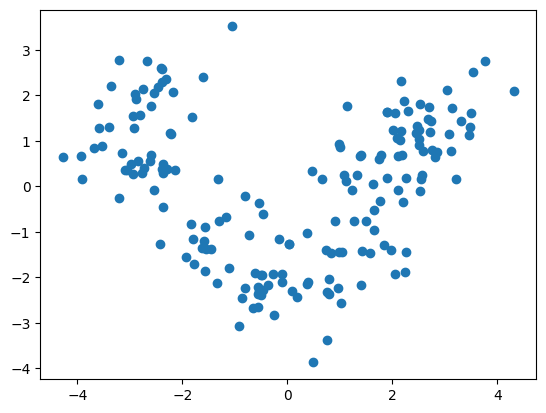

In [10]:
plt.scatter(X['V1'] , X['V2'])
plt.show()

In [11]:
score = []
elbow = []
for i in range(2,11):
    km = KMeans(n_clusters=i , random_state=42)
    y_pred = km.fit_predict(X)
    score.append(silhouette_score(X,y_pred))
    elbow.append(km.inertia_)

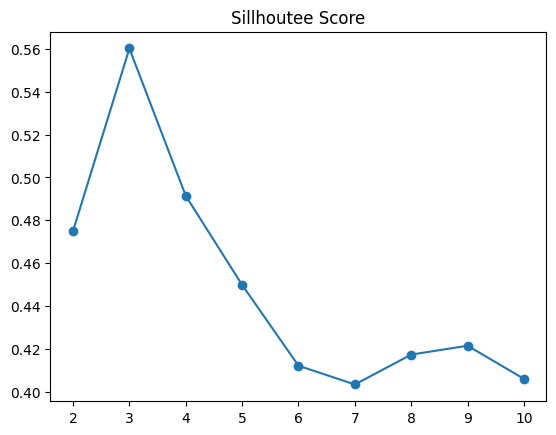

In [12]:
plt.plot(range(2,11) , score , marker = 'o')
plt.title('Sillhoutee Score')
plt.show()

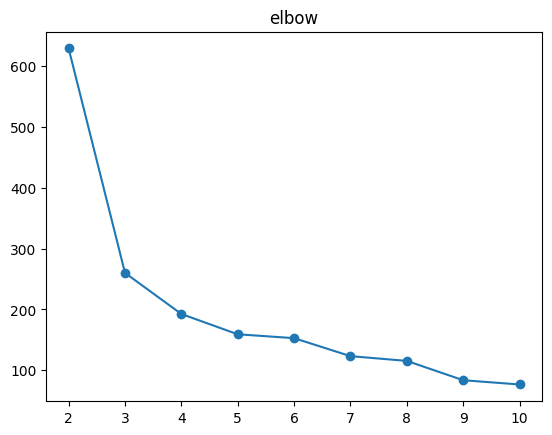

In [13]:
plt.plot(range(2,11) , elbow , marker = 'o')
plt.title('elbow')
plt.show()

In [14]:
km = KMeans(n_clusters=3 , random_state=42)
y_pred = km.fit_predict(X)

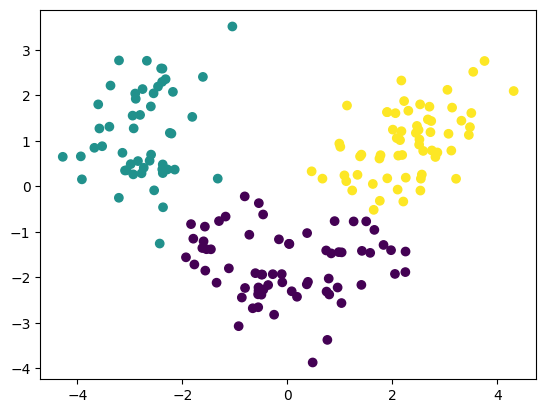

In [15]:
plt.scatter(X['V1'] , X['V2'] , c = y_pred)
plt.show()

## Fit All Data Without PCA

In [16]:
score = []
elbow = []
for i in range(2,11):
    km = KMeans(n_clusters=i , random_state=42)
    y_pred = km.fit_predict(df)
    score.append(silhouette_score(df,y_pred))
    elbow.append(km.inertia_)

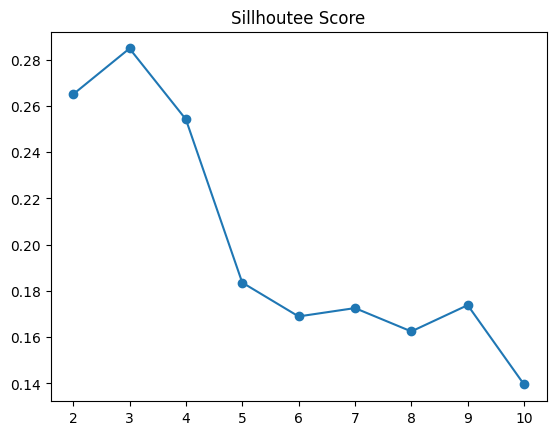

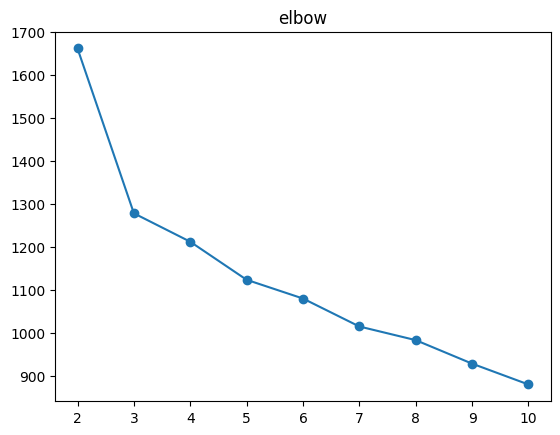

In [17]:
plt.plot(range(2,11) , score , marker = 'o')
plt.title('Sillhoutee Score')
plt.show()
plt.plot(range(2,11) , elbow , marker = 'o')
plt.title('elbow')
plt.show()

## Try all 2 colums to find best two

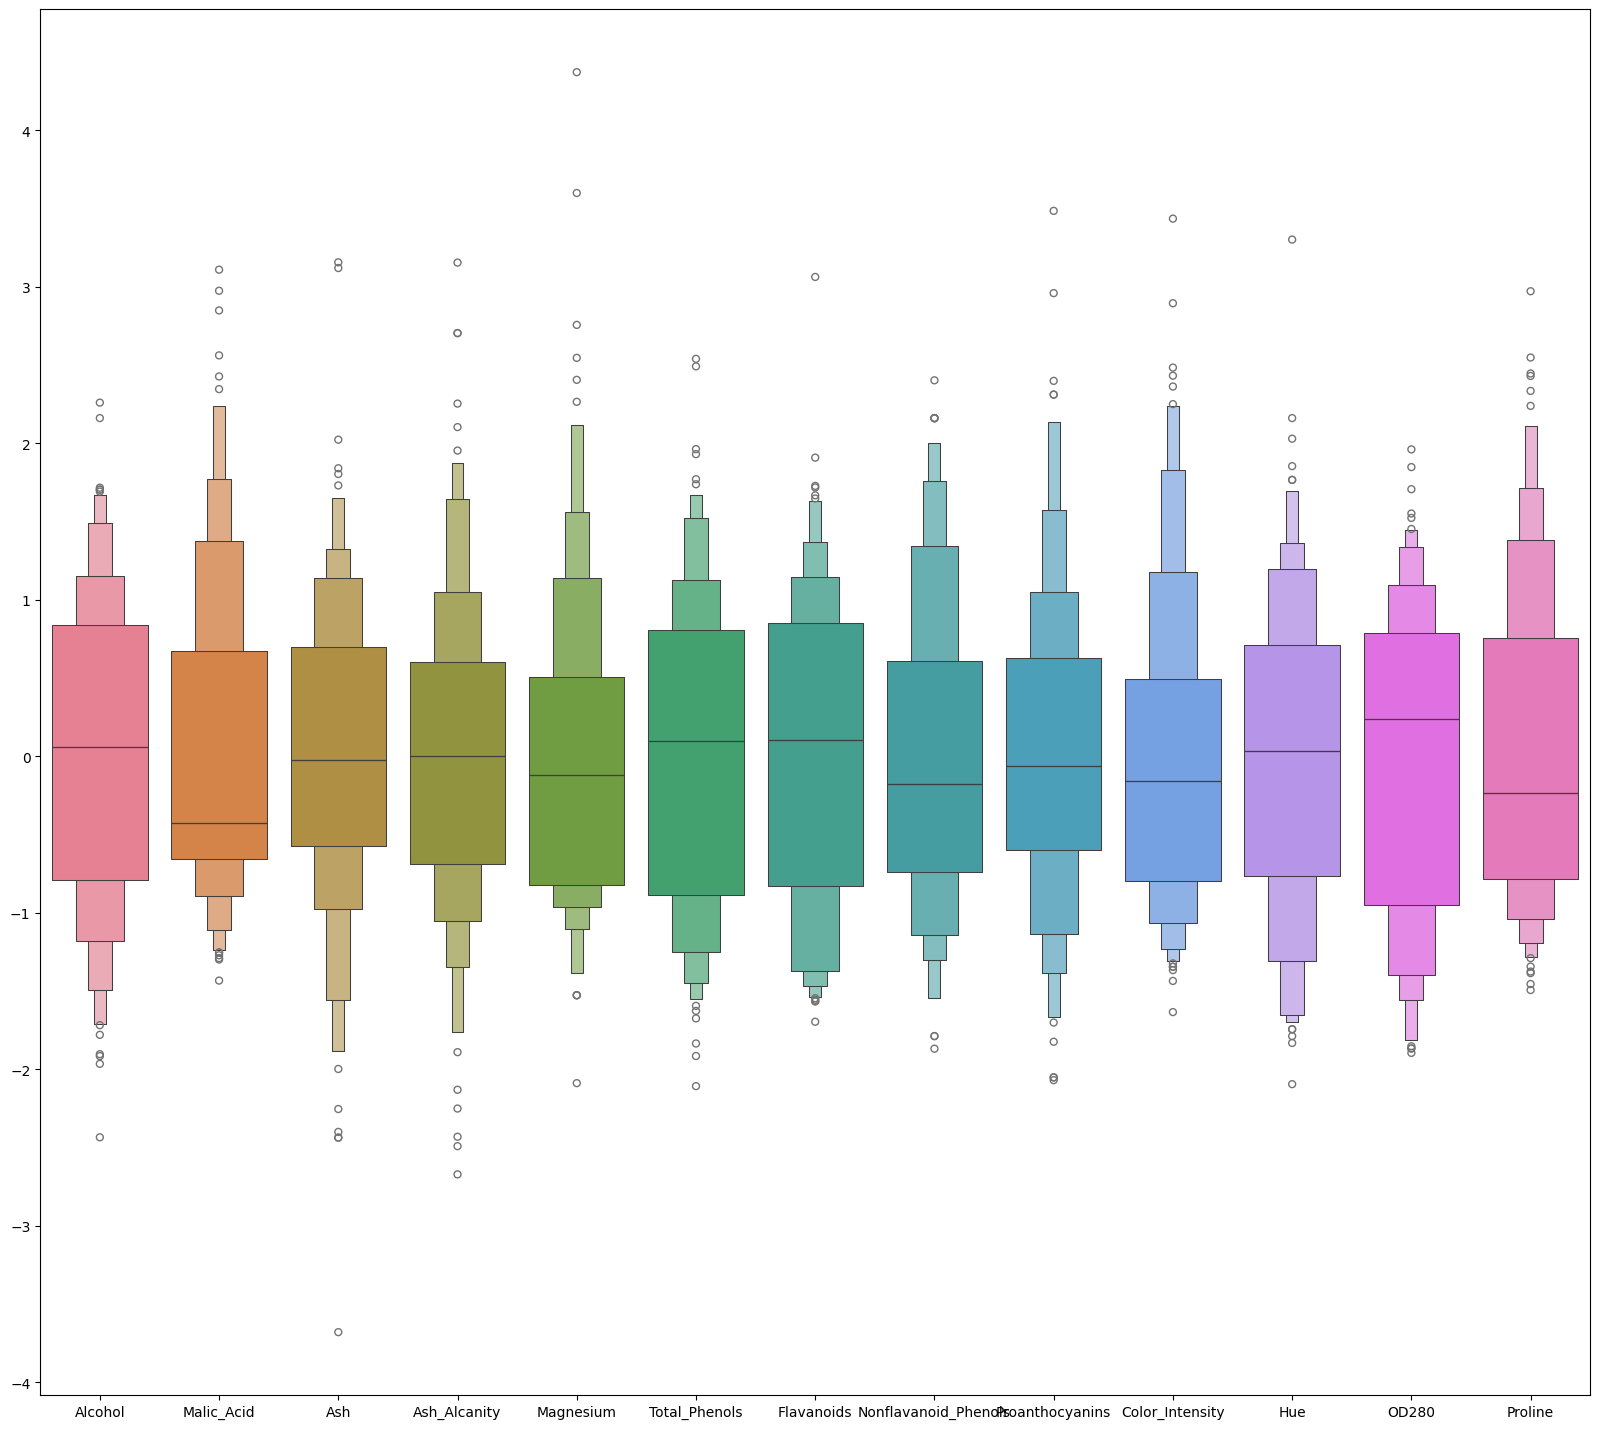

In [18]:
plt.figure(figsize=(20,18))
sns.boxenplot(df)
plt.show()

In [19]:
feature_pairs = list(combinations(df.columns, 2))

In [20]:
feature_pairs

[('Alcohol', 'Malic_Acid'),
 ('Alcohol', 'Ash'),
 ('Alcohol', 'Ash_Alcanity'),
 ('Alcohol', 'Magnesium'),
 ('Alcohol', 'Total_Phenols'),
 ('Alcohol', 'Flavanoids'),
 ('Alcohol', 'Nonflavanoid_Phenols'),
 ('Alcohol', 'Proanthocyanins'),
 ('Alcohol', 'Color_Intensity'),
 ('Alcohol', 'Hue'),
 ('Alcohol', 'OD280'),
 ('Alcohol', 'Proline'),
 ('Malic_Acid', 'Ash'),
 ('Malic_Acid', 'Ash_Alcanity'),
 ('Malic_Acid', 'Magnesium'),
 ('Malic_Acid', 'Total_Phenols'),
 ('Malic_Acid', 'Flavanoids'),
 ('Malic_Acid', 'Nonflavanoid_Phenols'),
 ('Malic_Acid', 'Proanthocyanins'),
 ('Malic_Acid', 'Color_Intensity'),
 ('Malic_Acid', 'Hue'),
 ('Malic_Acid', 'OD280'),
 ('Malic_Acid', 'Proline'),
 ('Ash', 'Ash_Alcanity'),
 ('Ash', 'Magnesium'),
 ('Ash', 'Total_Phenols'),
 ('Ash', 'Flavanoids'),
 ('Ash', 'Nonflavanoid_Phenols'),
 ('Ash', 'Proanthocyanins'),
 ('Ash', 'Color_Intensity'),
 ('Ash', 'Hue'),
 ('Ash', 'OD280'),
 ('Ash', 'Proline'),
 ('Ash_Alcanity', 'Magnesium'),
 ('Ash_Alcanity', 'Total_Phenols'),
 (

In [21]:
score = -10
n = -1
col1 , col2 = "",""
for f1 , f2 in feature_pairs:
    for i in range(2,11):
        km = KMeans(n_clusters=i , random_state=42)
        y_pred = km.fit_predict(df[[f1 , f2]])
        temp = silhouette_score(df[[f1,f2]] , y_pred)
        if temp >= score:
            score = temp
            n = i
            col1 = f1
            col2  = f2

In [22]:
print("Best Two Colums Is:" , col1 , "," , col2 , "With Score:" , score , "And N:" , n)

Best Two Colums Is: Flavanoids , OD280 With Score: 0.6146605915862803 And N: 2


In [23]:
km = KMeans(n_clusters=2 , random_state=42)
km.fit(df[['Flavanoids' , 'OD280']])

KMeans(n_clusters=2, random_state=42)

In [ ]:
center = km.cluster_centers_
center

array([[ 0.6662987 ,  0.69114186],
       [-1.05255881, -1.09180381]])

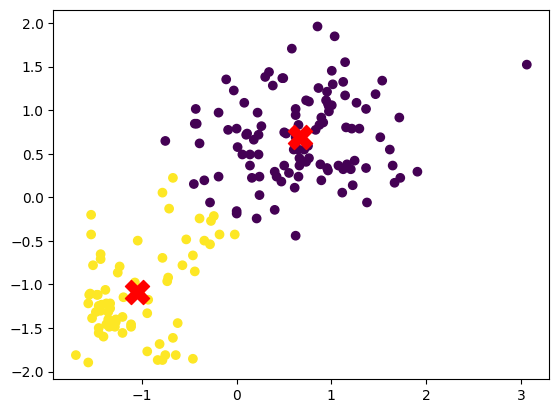

In [33]:
plt.scatter(df['Flavanoids'] , df['OD280'] , c=km.labels_)
plt.scatter(center[:,0] , center[:,1] , marker='X' , s=300 , c = 'r')
plt.show()

## Try DBscan 

In [25]:
db = DBSCAN(eps=0.4 , min_samples=5)
y_pred = db.fit_predict(df[['Flavanoids' , 'OD280']])
silhouette_score(df[['Flavanoids' , 'OD280']] , y_pred)

np.float64(0.45508601907639357)

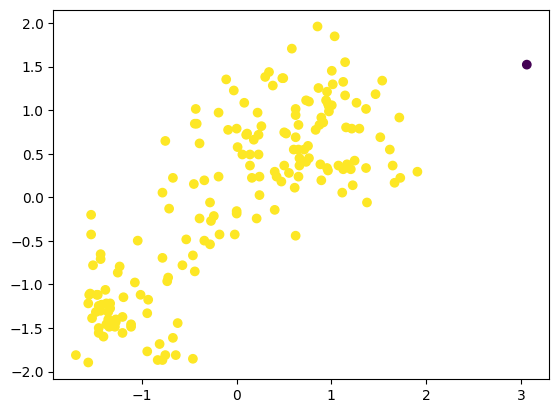

In [26]:
plt.scatter(df['Flavanoids'] , df['OD280'] , c=db.labels_)
plt.show()